## matplotlib : 데이터 시각화
* matplotlib
* pandas
* seaborn 자주사용

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

## 선그래프

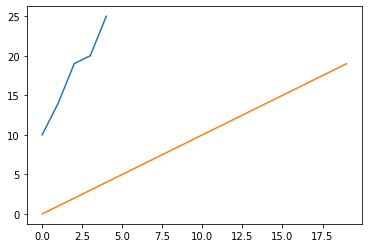

In [9]:
a1 = np.array([10, 14, 19, 20, 25])
# print(a1)
plt.plot(a1)
# plt.show()

a2 = np.arange(20)
# print(a2)
plt.plot(a2)
plt.show() # 새 프레임에 그래프를 출력

[-4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.
  2.5  3.   3.5  4.   4.5] [-9. -8. -7. -6. -5. -4. -3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.
  9.]


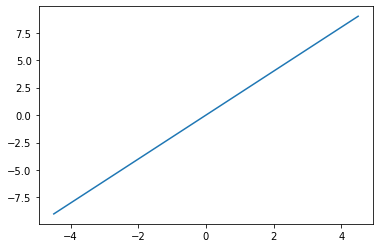

In [12]:
# 1차 방정식의 그래프 : f(x) = a*x + b 직선의 방정식
x = np.arange(-4.5, 5, 0.5)
y = 2 * x + 0
print(x, y)
plt.plot(x, y)
plt.show()

[-4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.
  2.5  3.   3.5  4.   4.5] [40.5 32.  24.5 18.  12.5  8.   4.5  2.   0.5  0.   0.5  2.   4.5  8.
 12.5 18.  24.5 32.  40.5]


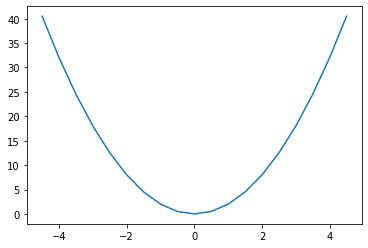

In [13]:
# 2차 방정식의 그래프 : f(x) = a*x^2 + b 포물선의 방정식
x = np.arange(-4.5, 5, 0.5)
y = 2 * x ** 2 + 0
print(x, y)
plt.plot(x, y)
plt.show()

## 로그 플롯(log plot)

In [24]:
print(np.log(100)) # 밑이 자연로그 e(2.71)인 로그에 100을 넣은것
print(np.exp(4.605170185988092))
# 1000 = 10 ** 3
# log(1000) = 6
# log(100) = 4.6051~~
# 100 = e**4.60517~~

4.605170185988092
100.00000000000004


In [36]:
df = pd.read_csv('transcount.csv')
df

,trans_count,year
0,2600000000,2011
1,4310000000,2014
2,1000000000,2010
3,5000000000,2012
4,1200000000,2012
...,...,...
76,785000,2012
77,5000000000,2009
78,8500,1983
79,5000000000,2013


In [42]:
df = df.groupby('year').agg(np.mean) # 연도별로 묶은 후 평균내기
df

,trans_count
year,
1971,2.300000e+03
1972,3.500000e+03
1974,4.533333e+03
1975,3.510000e+03
1976,7.500000e+03
1978,1.900000e+04
1979,4.850000e+04
1982,9.450000e+04
1983,8.500000e+03


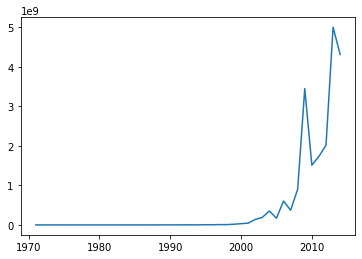

In [43]:
years = df.index.values # index(연도)가 ndarray로 반환
counts = df['trans_count'] # trans_count 열이 ndarray로 반환.
# print(years, counts)
plt.plot(years, counts) # 그래프 그리기
plt.show() # 그래프 보여주기

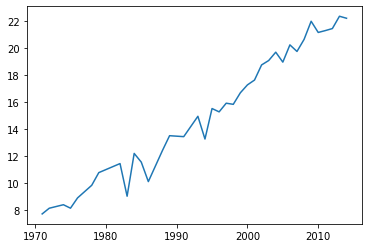

In [45]:
plt.plot(years, np.log(counts)) # 자연로그
plt.show()

In [49]:
# np.log(0) == inf
print(np.log1p(0)) # 1을 더한후 log 변환. log(0)은 무한대이기 때문.
# np.log1p(x) = np.log(0 + 1)
print(np.log(1))
np.log1p(0) == np.log(1)

0.0
0.0


True

## 로그 플롯

[ 3.61559210e-01 -7.05783195e+02]


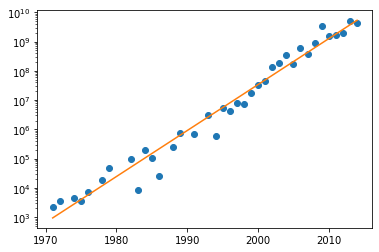

array([ 6.85000925,  7.21156847,  7.93468689,  8.2962461 ,  8.65780531,
        9.38092373,  9.74248294, 10.82716057, 11.18871978, 11.55027899,
       11.9118382 , 12.27339741, 12.99651583, 13.35807504, 14.08119346,
       14.80431188, 15.16587109, 15.52743031, 15.88898952, 16.25054873,
       16.61210794, 16.97366715, 17.33522636, 17.69678557, 18.05834478,
       18.41990399, 18.7814632 , 19.14302241, 19.50458162, 19.86614083,
       20.22770004, 20.58925925, 20.95081846, 21.31237767, 21.67393688,
       22.03549609, 22.3970553 ])

In [73]:
## 선형 회귀 (Linear Regression)
# y = f(x) 같은 관계. x의 값에 따라 y를 예측할 수 있다.
years = df.index.values
counts = df['trans_count'].values
plt.semilogy(years, counts, 'o') # o를 이용하면 점으로 찍힘, +로 하면 +로 찍힘.

# polyfit (x, y, ...) : x, y 값을 사용하여 오차가 가장 적은 직선의
# 기울기와 y절편을 구해주는 함수. 예측방정식(H(x) = w*x + b)를 얻는다.
poly = np.polyfit(years, np.log(counts), deg = 1)
print(poly)
# 기울기가 3.6~~, y절편이 7.0~~인 그래프임을 알려준다.
# 이를 이용하여 f(x) = 3.61559210e-01 * x -7.05783195e+02 로
# 아래의 그래프에 기준선을 그려줄 수 있다.
# np.exp에 기울기와 y 절편을 넣으면 로그를..뭘해서
# 예측방정식을 만들어준다.
plt.semilogy(years, np.exp(np.polyval(poly, years)))

plt.show()

np.polyval(poly, years) # polyfit() 으로 얻은 poly 내의 기울기와 y절편을 이용하여
# x 값을 넣어 예측값(H(x), y축의값)을 구한다.

# 분산 플롯 scatter plot : scatter(), 버블차트

1997 15.913528485217045


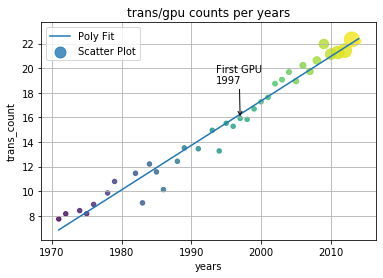

In [86]:
df = pd.read_csv('transcount.csv')
df = df.groupby('year').agg(np.mean)
gpu = pd.read_csv('gpu_transcount.csv')
gpu = gpu.groupby('year').agg(np.mean)
# print(df)
# print(gpu)

df = pd.merge(df, gpu, how = 'outer', left_index = True, right_index = True)
df = df.replace(np.nan, 0) # 결측치 0으로 변경

years = df.index.values # x값
counts = df['trans_count'].values
cnt_log = np.log(counts) # 로그 변환한 y값
gpu_counts = df['gpu_trans_count'].values # 버블의 크기

## 추가 코드
# 예측 방정식의 직선 그래프 출력
poly = np.polyfit(years, cnt_log, deg = 1)
plt.plot(years, np.polyval(poly, years), label = 'Poly Fit')
# annotation 주석 달기
gpu_start = gpu.index.values.min() # 1997
y_ann = np.log(df.at[1997, 'trans_count']) # 1997년 trans_count 로그 값
print(gpu_start, y_ann) # 1997 15.913528485217045
ann_str = 'First GPU\n{}'.format(gpu_start)
plt.annotate(ann_str, xy = (gpu_start, y_ann),
             arrowprops = dict(arrowstyle='->'), xytext = (-24, +35), 
             textcoords = 'offset points')

plt.scatter(years, cnt_log, c = 200 * years,
            s = 20 + 200 * gpu_counts / gpu_counts.max(),
            alpha = 0.8, label = 'Scatter Plot')
# c : 컬러, s : 버블의 크기, alpha : 투명도
plt.grid(True)
plt.xlabel('years')
plt.ylabel('trans_count')
plt.title('trans/gpu counts per years')

plt.legend(loc = 'upper left')

plt.show()

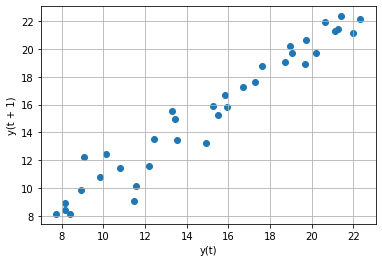

In [91]:
# 지연플롯 : time series data(시계열 데이터) 분석
from pandas.plotting import lag_plot

# 지연값 : 1년
# x축 : 기준년도의 trans_count값
# y축 : 기준년도 + 1의 trans_count의 로그 값
lag_plot(np.log(df['trans_count']))
plt.grid()
plt.show()

In [88]:
# 자기 상관 플롯

# Box plot
* pandas, matplotlib 사용

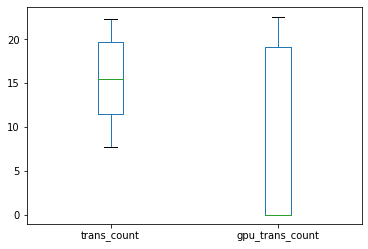

In [3]:
# pandas
df = pd.read_csv('transcount.csv')
# 년도로 그룹지어 평균값내기
df = df.groupby('year').agg(np.mean)

gpu = pd.read_csv('gpu_transcount.csv')
# 년도로 그룹지어 평균값내기
gpu = gpu.groupby('year').agg(np.mean)

# gpu와 df 합치기
df = pd.merge(df, gpu, how = 'outer', left_index = True, right_index = True)

# 로그변환
df['trans_count'] = np.log(df['trans_count']).values
df['gpu_trans_count'] = np.log(df['gpu_trans_count']).values
df = df.replace(np.nan, 0) # 결측치를 0으로 변경, df.fillna(0)

df.plot.box() # 박스그리기
plt.show() # 박스보여주기